In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt

In [2]:
#read dataset
dataset=pd.read_csv("Salary_Data.csv")
dataset.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [3]:
#dataset shape
dataset.shape

(30, 2)

In [4]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [5]:
#dataset describe
dataset.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [6]:
#check dataset values null or not
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#check duplicate values in dataset
dataset.duplicated().sum()

0

In [8]:
# split data into train and test
train,test=train_test_split(dataset,test_size=0.3)

In [9]:
#shape of train,test data
dataset.shape,train.shape,test.shape

((30, 2), (21, 2), (9, 2))

In [10]:
#convert test data into test.csv file
test.to_csv("test.csv",index=False,encoding='utf-8')

In [11]:
#split train data into train_data and cross validation
train_data,cv_data=train_test_split(train,test_size=0.3)

In [12]:
train_data.shape,cv_data.shape

((14, 2), (7, 2))

In [13]:
# train_data.shape

In [14]:
#separate the train data into x_train and y_train
x_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,1]

In [15]:
x_train.shape,y_train.shape

((14, 1), (14,))

In [16]:
# print(x_train)

In [17]:
# print(y_train)

In [18]:
#feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
print(x_train)

[[-0.05026902]
 [ 0.01675634]
 [-1.25672552]
 [-0.35188315]
 [-0.68700995]
 [-1.32375088]
 [-0.72052263]
 [ 1.49131428]
 [-0.95511139]
 [ 1.32375088]
 [-0.45242119]
 [ 0.0837817 ]
 [ 1.05564944]
 [ 1.82644109]]


In [19]:
#separate the cv_data into x_cv and y_cv
x_cv=cv_data.iloc[:,:-1]
y_cv=cv_data.iloc[:,1]

In [20]:
x_cv.shape,y_cv.shape

((7, 1), (7,))

In [21]:
x_cv=sc.transform(x_cv)
print(x_cv)

[[-0.31837046]
 [-0.61998459]
 [ 1.52482696]
 [ 0.31837046]
 [-0.35188315]
 [ 1.75941573]
 [-1.18970016]]


In [22]:
#create object of class and then fit x_train,y_train data using regressor object
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#predicating the train dataset
y_predict=regressor.predict(x_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_predict})  
df


Actual      Predicted
15   67938.0   72307.049898
16   66029.0   74151.650034
1    46205.0   39104.247443
12   56957.0   64006.349284
6    60150.0   54783.348602
0    39343.0   37259.647307
5    56642.0   53861.048534
26  116969.0  114732.853034
4    39891.0   47404.948057
25  105582.0  110121.352693
9    57189.0   61239.449079
17   83088.0   75996.250170
23  113812.0  102742.952148
29  121872.0  123955.853716

In [24]:
# getting predictions on cross validation dataset
y_pred = regressor.predict(x_cv)
df = pd.DataFrame({'Actual': y_cv, 'Predicted': y_pred})  
df



Actual      Predicted
13   57081.0   64928.649352
7    54445.0   56627.948739
27  112635.0  115655.153103
19   93940.0   82452.350648
11   55794.0   64006.349284
28  122391.0  122111.253580
2    37731.0   40948.847579

In [25]:
# sklearn.metrics.accuracy_score(y_test,y_pred)

acc_train=sklearn.metrics.r2_score(y_train,y_predict)*100
print("Accuracy of train data =",acc_train)

acc_test=sklearn.metrics.r2_score(y_cv,y_pred)*100
print("Accuracy of cross data =",acc_test)

Accuracy of train data = 95.48246725071832
Accuracy of cross data = 95.61787629786377


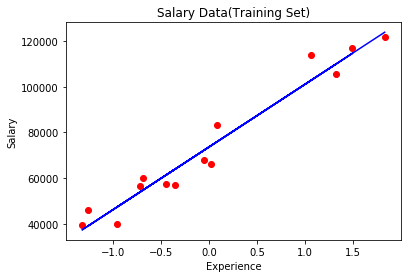

In [26]:
# visualizing the training set result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary Data(Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

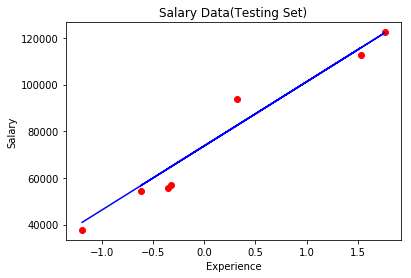

In [27]:
# visualizing the testing set result
plt.scatter(x_cv,y_cv,color='red')
plt.plot(x_cv,regressor.predict(x_cv),color='blue')
plt.title('Salary Data(Testing Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


In [28]:
fileObject = open("train_data.pkl",'wb')
pickle.dump(regressor,fileObject)   
# here we close the fileObject
pickle.dump(sc,fileObject)
fileObject.close()
